<a href="https://colab.research.google.com/github/LovaMarline/Air_Quality_Madagascar/blob/main/Marline_et_al_ERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving merged_data.csv to merged_data.csv


<ipython-input-3-e7906aeda0c4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_pm25_data['latitude'] = -18.85269
<ipython-input-3-e7906aeda0c4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_pm25_data['longitude'] = 47.47651


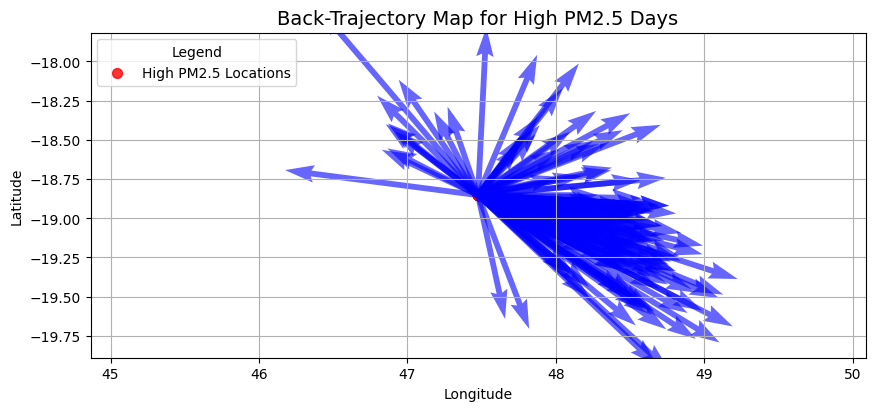

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the uploaded dataset
data = pd.read_csv("merged_data.csv")

# Filter for high PM2.5 days
high_pm25_threshold = 35
high_pm25_data = data[data['PM2.5DailyMean'] > high_pm25_threshold]

# Add latitude and longitude (US embassy)
high_pm25_data['latitude'] = -18.85269
high_pm25_data['longitude'] = 47.47651

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    high_pm25_data,
    geometry=gpd.points_from_xy(high_pm25_data['longitude'], high_pm25_data['latitude']),
    crs="EPSG:4326"
) #Mitovy amin'ny R

# Create the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot PM2.5 locations
gdf.plot(ax=ax, color='red', markersize=50, label='High PM2.5 Locations', alpha=0.8)

# Add wind vectors
for _, row in gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    dx = row['wspd'] * np.sin(np.deg2rad(row['wdir'])) * 0.1  # Adjust scale
    dy = row['wspd'] * np.cos(np.deg2rad(row['wdir'])) * 0.1
    ax.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.6)

# Customize the map
ax.set_title('Back-Trajectory Map for High PM2.5 Days', fontsize=14)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend(loc='upper left', title='Legend')
plt.grid(True)

plt.show()


In [4]:
plt.savefig("Back_trajectory_map.png", dpi=300)


<Figure size 640x480 with 0 Axes>

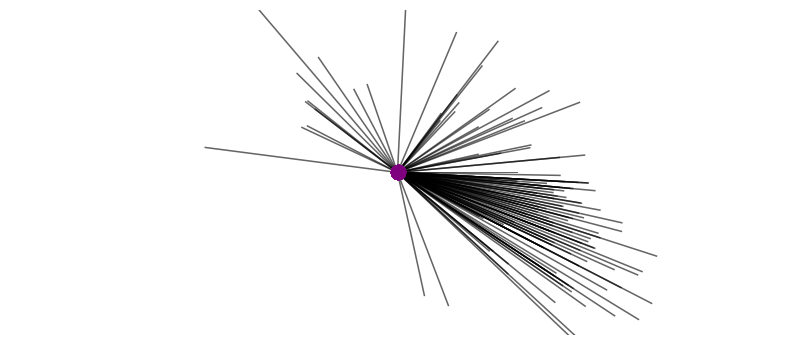

In [5]:
# Plot and save the map
fig, ax = plt.subplots(figsize=(10, 10))

# Addind wind vectors
for _, row in gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    dx = row['wspd'] * np.sin(np.deg2rad(row['wdir'])) * 0.1
    dy = row['wspd'] * np.cos(np.deg2rad(row['wdir'])) * 0.1
    ax.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=1, color='black', alpha=0.6, width=0.002, headaxislength=0, headlength=0, headwidth=0)

# Plot high PM2.5 location
gdf.plot(ax=ax, color='purple', markersize=100, label='High PM2.5 Location', alpha=0.8, zorder=3)

# Remove grid, legend, axis labels, and title
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('')
ax.legend().remove()
ax.grid(False)

ax.set_xticks([])  # Remove x-axis ticks
ax.set_yticks([])  # Remove y-axis ticks
ax.axis('off')  # turn off the axes, including borders

# Make the background transparent
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Save before displaying the plot
plt.savefig("Back_trajectory_map.png", dpi=300)
plt.show()


In [6]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 63.1 MB/s eta 0:00:00


<ipython-input-7-b658308ed00a>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_pm25_data['latitude'] = -18.85269
<ipython-input-7-b658308ed00a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_pm25_data['longitude'] = 47.47651


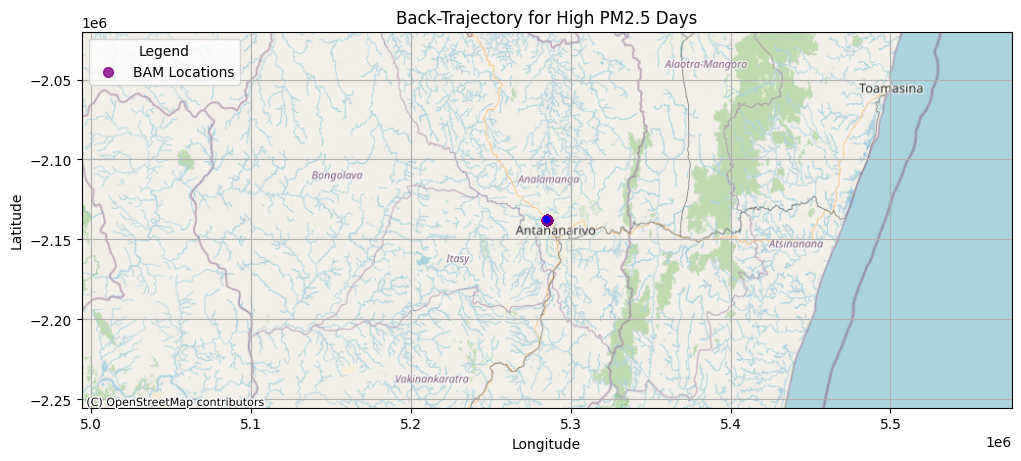

In [7]:
# Required Libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import contextily as ctx

# Load the dataset
data = pd.read_csv("merged_data.csv")

# Step 1: Filter for high PM2.5 days
high_pm25_threshold = 35
high_pm25_data = data[data['PM2.5DailyMean'] > high_pm25_threshold]

# Add latitude and longitude columns
high_pm25_data['latitude'] = -18.85269
high_pm25_data['longitude'] = 47.47651

# Convert to GeoDataFrame for mapping
gdf = gpd.GeoDataFrame(
    high_pm25_data,
    geometry=gpd.points_from_xy(high_pm25_data['longitude'], high_pm25_data['latitude']),
    crs="EPSG:4326"
)

# Reproject to Web Mercator for contextily basemaps
gdf = gdf.to_crs(epsg=3857)

# Step 2: Create the map
fig, ax = plt.subplots(figsize=(12, 12))

# Plot PM2.5 locations
gdf.plot(ax=ax, color='purple', markersize=50, label='BAM Locations', alpha=0.8)

# Add wind vectors with scaling
scaling_factor = 0.01  # Adjust for vector length
for _, row in gdf.iterrows():
    x, y = row.geometry.x, row.geometry.y
    dx = row['wspd'] * np.sin(np.deg2rad(row['wdir'])) * scaling_factor
    dy = row['wspd'] * np.cos(np.deg2rad(row['wdir'])) * scaling_factor
    ax.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.6)

# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize the map
ax.set_title('Back-Trajectory for High PM2.5 Days', fontsize=12)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.legend(loc='upper left', title='Legend')
plt.grid(True)

# Save the map to file and display
plt.savefig("Back_trajectory_map_with_basemap.png", dpi=300, bbox_inches='tight')
plt.show()
